<a href="https://colab.research.google.com/github/ahan-b/Projects/blob/main/EDA_on_IMR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the required Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Uploading the Dataset and initial analysis of the variables present and their respective data types

In [2]:
df=pd.read_csv('InfantMortalityRate.csv',encoding = "ISO-8859-1")
df.head()

,Country,Infant Mortality Rate,Gender,Year
0,Afghanistan,43.050731,Female,2019.0
1,Angola,44.851045,Female,2019.0
2,Albania,7.659442,Female,2019.0
3,Andorra,2.555451,Female,2019.0
4,United Arab Emirates,5.716825,Female,2019.0


In [3]:
#there are 229 unique countries
df.Country.nunique()

229

In [4]:
df.shape

(7625, 4)

In [5]:
print(df[df.duplicated()])

            Country  Infant Mortality Rate  Gender    Year
205   North America               4.954589  Female  2019.0
436   North America               5.035195  Female  2018.0
667   North America               5.100352  Female  2017.0
898   North America               5.154236  Female  2016.0
1129  North America               5.206922  Female  2015.0
1360  North America               5.257976  Female  2014.0
1591  North America               5.307824  Female  2013.0
1822  North America               5.387218  Female  2012.0
2053  North America               5.471592  Female  2011.0
2284  North America               5.553101  Female  2010.0
2515  North America               5.639329  Female  2009.0
2746  North America               5.901276    Male  2019.0
2977  North America               5.995441    Male  2018.0
3208  North America               6.068601    Male  2017.0
3439  North America               6.128684    Male  2016.0
3670  North America               6.191640    Male  2015

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7625 entries, 0 to 7624
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                7623 non-null   object 
 1   Infant Mortality Rate  7623 non-null   float64
 2   Gender                 7623 non-null   object 
 3   Year                   7623 non-null   float64
dtypes: float64(2), object(2)
memory usage: 238.4+ KB


In [7]:
df.isnull().sum()

Country                  2
Infant Mortality Rate    2
Gender                   2
Year                     2
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7623 entries, 0 to 7622
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                7623 non-null   object 
 1   Infant Mortality Rate  7623 non-null   float64
 2   Gender                 7623 non-null   object 
 3   Year                   7623 non-null   float64
dtypes: float64(2), object(2)
memory usage: 297.8+ KB


In [10]:
df.Gender.unique()

array(['Female', 'Male', 'Total'], dtype=object)

# Making splits of the dataset based on the Kind of IMR reported for further analysis

In [11]:
#separating the part with female infant mortality rate, male mortality rate and total mortlaity rate
df_females=df[df['Gender']=='Female'] #data for females only
df_males=df[df['Gender']=='Male'] #data f0r males only
df_total=df[df['Gender']=='Total'] #data for the total IMR of a country

In [12]:
print('shape of females dataset:',df_females.shape)

shape of females dataset: (2541, 4)


In [13]:
print('shape of male dataset:',df_males.shape)

shape of male dataset: (2541, 4)


In [14]:
print('shape of total dataset:',df_total.shape)

shape of total dataset: (2541, 4)


##Initial Visualisation


In [16]:
df_total.Year.unique()
#the dataset contains data for IMR from the year 2009 to 2019

array([2019., 2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009.])

In [18]:
index_names = df[ df['Gender'] == 'Total' ].index
index_names
# drop these row indexes
# from dataFrame
df_both_genders=df.drop(index_names)
df_both_genders.shape
#creation of a dataset which has the data on IMR for both Male and Female of each of the 229 countries

(5082, 4)

In [19]:
df_both_genders.Gender.unique() #data for both the genders

array(['Female', 'Male'], dtype=object)

<Figure size 1728x864 with 0 Axes>

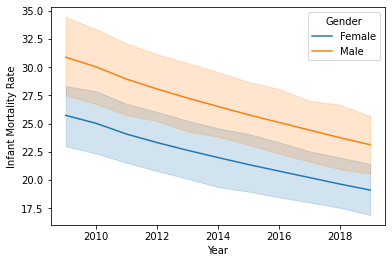

<Figure size 1728x864 with 0 Axes>

In [20]:
sns.lineplot(x=df_both_genders['Year'],y=df_both_genders['Infant Mortality Rate'],hue=df_both_genders['Gender'])
plt.figure(figsize=(24,12))
#first insight is that the IMR is coming down.
# 2nd is that the IMR for males is higher than the IMR for females.

# Inferences from the visualisation above

*   IMR for both Males and Females is showing a decreasing trend.
*   IMR for Males is higher than the IMR for females



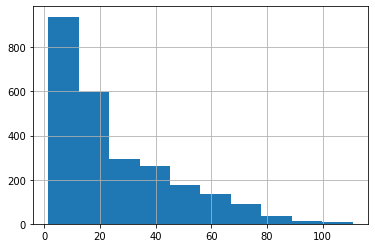

In [21]:
df_total['Infant Mortality Rate'].hist()
#frequency on the Y axis and IMR values on the X axis 
#we can see that majority of the values are not too large
# this can be inferred from the right skew of the Histogram

# Inferences from Histogram on Total IMR Rates

*   The graph is Right Skewed which shows that majority of the countries in the dataset has low values of IMR except for few which has pretty high IMR




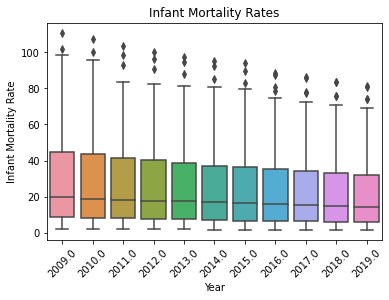

In [22]:
plt.xticks(rotation=45)
plt.title('Infant Mortality Rates')
sns.boxplot(x= df_total['Year'], y= df_total['Infant Mortality Rate'])

# The boxplot above shows the overall trend in terms of the IMR and the number of outliers each year


# Dataframe containing the Total IMR rates for the Year 2019 is created below

In [23]:
IMR_2019=df_total[df_total['Year']==2019]
IMR_2019.describe()

,Infant Mortality Rate,Year
count,231.000000,231.0
mean,21.160393,2019.0
std,18.672680,0.0
min,1.493181,2019.0
25%,5.846095,2019.0
50%,14.486694,2019.0
75%,32.241502,2019.0
max,81.003217,2019.0


In [24]:
df_total['Year'] = df_total['Year'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


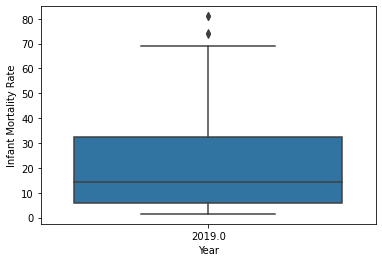

In [25]:
sns.boxplot(x=IMR_2019['Year'],y=IMR_2019['Infant Mortality Rate'])

In [38]:
#calculation of the IQR to determine which countries are the Outliers in the year 2019
q1=IMR_2019['Infant Mortality Rate'].quantile(0.25)
Q3=IMR_2019['Infant Mortality Rate'].quantile(0.75)
print("q1:",q1,"q3:",Q3)

q1: 5.8460945332872996 q3: 32.241501948547


In [27]:
IQR=Q3-q1
print(IQR)

26.395407415259697


In [28]:
#upper whisker
upper_whisker=Q3+1.5*(IQR)
lower_whisker=q1-1.5*(IQR)
print(upper_whisker,lower_whisker)

71.83461307143654 -33.74701658960225


In [29]:
# countries which are the outliers with extremely high infant mortality rates
countries_with_high_IMR=IMR_2019[IMR_2019['Infant Mortality Rate']>upper_whisker]
countries_with_high_IMR.sort_values(by='Infant Mortality Rate', ascending=False, inplace=True)
countries_with_high_IMR

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Country,Infant Mortality Rate,Gender,Year
5110,Central African Republic,81.003217,Total,2019.0
5237,Sierra Leone,80.921036,Total,2019.0
5208,Nigeria,74.160317,Total,2019.0
5240,Somalia,74.032143,Total,2019.0


In [39]:
# Central African Republic, Sierra Leone, Nigeria & Somalia are the worst performing countries in the year 2019

In [33]:
top_countries=IMR_2019.sort_values(by='Infant Mortality Rate',ascending=True)
top_countries.head()

,Country,Infant Mortality Rate,Gender,Year
5239,San Marino,1.493181,Total,2019.0
5164,Iceland,1.553077,Total,2019.0
5246,Slovenia,1.660515,Total,2019.0
5169,Japan,1.797329,Total,2019.0
5125,Cyprus,1.839560,Total,2019.0


In [35]:
#the Best country in terms of IMR in the dataset for the year 2019 is San Marino and the worst is Central African Republic

# Dataframes for each year is created so as to see which are the countries which are consistenly performing well in terms of IMR and which are not doing so well 

In [34]:
x_2009=df_total[df_total['Year']==2009]
x_2010=df_total[df_total['Year']==2010]
x_2011=df_total[df_total['Year']==2011]
x_2012=df_total[df_total['Year']==2012]
x_2013=df_total[df_total['Year']==2013]
x_2014=df_total[df_total['Year']==2014]
x_2015=df_total[df_total['Year']==2015]
x_2016=df_total[df_total['Year']==2016]
x_2017=df_total[df_total['Year']==2017]
x_2018=df_total[df_total['Year']==2018]

# Analysis of the Year 2009

In [40]:
#Descriptive stats for the year 2009
x_2009.describe()

,Infant Mortality Rate,Year
count,231.000000,231.0
mean,28.369246,2009.0
std,24.365958,0.0
min,2.144415,2009.0
25%,8.564789,2009.0
50%,20.048250,2009.0
75%,44.800758,2009.0
max,110.807610,2009.0


In [41]:
#worst countries in the year 2009
q3_2009=x_2009['Infant Mortality Rate'].quantile(0.75)
q1_2009=x_2009['Infant Mortality Rate'].quantile(0.25)
IQR_2009=q3_2009-q1_2009
worst_countries_2009=x_2009[x_2009['Infant Mortality Rate']>(1.5*IQR_2009+q3_2009)]
worst_countries_2009.sort_values(by='Infant Mortality Rate',ascending=False,inplace=True)
worst_countries_2009


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Country,Infant Mortality Rate,Gender,Year
7547,Sierra Leone,110.807610,Total,2009
7420,Central African Republic,101.892844,Total,2009


In [42]:
#worst countries in the world in 2009 are Sierra Leone and Central African Republic

In [43]:
#best countries in the world in 2009
best_countries_2009=x_2009.sort_values(by='Infant Mortality Rate',ascending=True)
best_countries_2009.head()


,Country,Infant Mortality Rate,Gender,Year
7474,Iceland,2.144415,Total,2009
7545,Singapore,2.237839,Total,2009
7479,Japan,2.428140,Total,2009
7496,Luxembourg,2.532759,Total,2009
7557,Sweden,2.555417,Total,2009


In [44]:
#best countries in the world in 2009 are Iceland,Singapore,japan,Luxembourg & Sweden

# Analysis of the Year 2010

In [45]:
#Descriptive stats for the year 2010
x_2010.describe()

,Infant Mortality Rate,Year
count,231.000000,231.0
mean,27.581952,2010.0
std,23.864036,0.0
min,2.069225,2010.0
25%,8.298411,2010.0
50%,18.647365,2010.0
75%,43.373720,2010.0
max,107.152659,2010.0


In [46]:
#worst countries in the year 2010
q3_2010=x_2010['Infant Mortality Rate'].quantile(0.75)
q1_2010=x_2010['Infant Mortality Rate'].quantile(0.25)
IQR_2010=q3_2010-q1_2010
worst_countries_2010=x_2010[x_2010['Infant Mortality Rate']>(1.5*IQR_2010+q3_2010)]
worst_countries_2010.sort_values(by='Infant Mortality Rate',ascending=False,inplace=True)
worst_countries_2010

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Country,Infant Mortality Rate,Gender,Year
7316,Sierra Leone,107.152659,Total,2010
7189,Central African Republic,100.290209,Total,2010


In [47]:
#worst countries in the world in 2010 are Sierra Leone and Central African Republic

In [48]:
#best countries in the world in 2010
best_countries_2010=x_2010.sort_values(by='Infant Mortality Rate',ascending=True)
best_countries_2010.head()

,Country,Infant Mortality Rate,Gender,Year
7243,Iceland,2.069225,Total,2010
7314,Singapore,2.235684,Total,2010
7248,Japan,2.348748,Total,2010
7318,San Marino,2.415347,Total,2010
7218,Finland,2.465200,Total,2010


In [49]:
#best countries in the world in the year 2010 are Iceland,Singapore,Japan, San Marino,Finland

# Analysis of the year 2011


In [50]:
#descriptive stats for the year 2011
x_2011.describe()

,Infant Mortality Rate,Year
count,231.000000,231.0
mean,26.562297,2011.0
std,22.914399,0.0
min,2.002791,2011.0
25%,8.146530,2011.0
50%,18.038662,2011.0
75%,41.576082,2011.0
max,103.538974,2011.0


In [51]:
#worst countries in the year 2011
q3_2011=x_2011['Infant Mortality Rate'].quantile(0.75)
q1_2011=x_2011['Infant Mortality Rate'].quantile(0.25)
IQR_2011=q3_2011-q1_2011
worst_countries_2011=x_2011[x_2011['Infant Mortality Rate']>(1.5*IQR_2011+q3_2011)]
worst_countries_2011.sort_values(by='Infant Mortality Rate',ascending=False,inplace=True)
worst_countries_2011

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Country,Infant Mortality Rate,Gender,Year
7085,Sierra Leone,103.538974,Total,2011
6958,Central African Republic,98.184585,Total,2011
7088,Somalia,92.966883,Total,2011


In [52]:
#worst countries in the world in 2011 are Sierra Leone, Central African Republic and Somalia

In [53]:
#best countries in the world in 2011
best_countries_2011=x_2011.sort_values(by='Infant Mortality Rate',ascending=True)
best_countries_2011.head()

,Country,Infant Mortality Rate,Gender,Year
7012,Iceland,2.002791,Total,2011
7083,Singapore,2.223932,Total,2011
7087,San Marino,2.234621,Total,2011
7017,Japan,2.296972,Total,2011
6987,Finland,2.350540,Total,2011


In [54]:
#best countries in the world in the year 2011 are Iceland,Singapore,San Marino,Japan & Finland

# Analysis of the year 2012

In [55]:
#descriptive stats for the year 2012
x_2012.describe()

,Infant Mortality Rate,Year
count,231.000000,231.0
mean,25.750883,2012.0
std,22.269036,0.0
min,1.937068,2012.0
25%,7.933871,2012.0
50%,17.818400,2012.0
75%,40.339557,2012.0
max,100.176109,2012.0


In [56]:
#worst countries in the year 2012
q3_2012=x_2012['Infant Mortality Rate'].quantile(0.75)
q1_2012=x_2012['Infant Mortality Rate'].quantile(0.25)
IQR_2012=q3_2012-q1_2012
worst_countries_2012=x_2012[x_2012['Infant Mortality Rate']>(1.5*IQR_2012+q3_2012)]
worst_countries_2012.sort_values(by='Infant Mortality Rate',ascending=False,inplace=True)
worst_countries_2012

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Country,Infant Mortality Rate,Gender,Year
6854,Sierra Leone,100.176109,Total,2012
6727,Central African Republic,96.150163,Total,2012
6857,Somalia,90.390829,Total,2012


In [57]:
#The worst countries in the world in 2012 are Sierra Leone, Central African Republic and Somalia

In [58]:
#best countries in the world in 2012
best_countries_2012=x_2012.sort_values(by='Infant Mortality Rate',ascending=True)
best_countries_2012.head()

,Country,Infant Mortality Rate,Gender,Year
6781,Iceland,1.937068,Total,2012
6856,San Marino,2.088433,Total,2012
6786,Japan,2.202261,Total,2012
6852,Singapore,2.205895,Total,2012
6756,Finland,2.247395,Total,2012


In [59]:
# the Best Countries in the year 2012 are Iceland,San Marino,Japan,Singapore & Finland

# Analysis of the year 2013

In [60]:
#descriptive stats for the year 2013
x_2013.describe()

,Infant Mortality Rate,Year
count,231.000000,231.0
mean,25.004571,2013.0
std,21.686978,0.0
min,1.875263,2013.0
25%,7.564962,2013.0
50%,17.689726,2013.0
75%,38.710443,2013.0
max,97.021639,2013.0


In [61]:
#worst countries in the year 2013
q3_2013=x_2013['Infant Mortality Rate'].quantile(0.75)
q1_2013=x_2013['Infant Mortality Rate'].quantile(0.25)
IQR_2013=q3_2013-q1_2013
worst_countries_2013=x_2013[x_2013['Infant Mortality Rate']>(1.5*IQR_2013+q3_2013)]
worst_countries_2013.sort_values(by='Infant Mortality Rate',ascending=False,inplace=True)
worst_countries_2013

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Country,Infant Mortality Rate,Gender,Year
6623,Sierra Leone,97.021639,Total,2013
6496,Central African Republic,94.649632,Total,2013
6626,Somalia,87.923068,Total,2013


In [62]:
#worst countries in the world in 2013 are Sierra Leone, Central African Republic and Somalia

In [63]:
#best countries in the world in 2013
best_countries_2013=x_2013.sort_values(by='Infant Mortality Rate',ascending=True)
best_countries_2013.head()

,Country,Infant Mortality Rate,Gender,Year
6550,Iceland,1.875263,Total,2013
6625,San Marino,1.961469,Total,2013
6555,Japan,2.134222,Total,2013
6525,Finland,2.159416,Total,2013
6621,Singapore,2.191767,Total,2013


In [64]:
#Best Countries in the world in 2013 are Iceland, San Marino, Japan, Finland & Singapore

# Analysis of the year 2014

In [65]:
#descriptive stats for the year 2014
x_2014.describe()

,Infant Mortality Rate,Year
count,231.000000,231.0
mean,24.311876,2014.0
std,21.155634,0.0
min,1.819100,2014.0
25%,7.159975,2014.0
50%,17.302288,2014.0
75%,37.175102,2014.0
max,94.873266,2014.0


In [66]:
#worst countries in the year 2014
q3_2014=x_2014['Infant Mortality Rate'].quantile(0.75)
q1_2014=x_2014['Infant Mortality Rate'].quantile(0.25)
IQR_2014=q3_2014-q1_2014
worst_countries_2014=x_2014[x_2014['Infant Mortality Rate']>(1.5*IQR_2014+q3_2014)]
worst_countries_2014.sort_values(by='Infant Mortality Rate',ascending=False,inplace=True)
worst_countries_2014

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Country,Infant Mortality Rate,Gender,Year
6392,Sierra Leone,94.873266,Total,2014
6265,Central African Republic,92.118656,Total,2014
6395,Somalia,85.318845,Total,2014


In [67]:
#worst countries in the world in 2014 are Sierra Leone, Central African Republic & Somalia

In [107]:
#best countries in the world in 2014
best_countries_2014=x_2014.sort_values(by='Infant Mortality Rate',ascending=True)
best_countries_2014.head()

,Country,Infant Mortality Rate,Gender,Year
6319,Iceland,1.819100,Total,2014
6394,San Marino,1.858635,Total,2014
6324,Japan,2.070027,Total,2014
6294,Finland,2.088227,Total,2014
6401,Slovenia,2.118629,Total,2014


In [68]:
# Best Countries in the world in 2014 are Iceland, San Marino, Japan, Finland & Slovenia

# Analysis for the year 2015

In [69]:
#descriptive stats for the year 2015
x_2015.describe()

,Infant Mortality Rate,Year
count,231.000000,231.0
mean,23.632423,2015.0
std,20.645554,0.0
min,1.762154,2015.0
25%,6.848171,2015.0
50%,16.624032,2015.0
75%,36.307739,2015.0
max,94.168116,2015.0


In [70]:
#worst countries in the year 2015
q3_2015=x_2015['Infant Mortality Rate'].quantile(0.75)
q1_2015=x_2015['Infant Mortality Rate'].quantile(0.25)
IQR_2015=q3_2015-q1_2015
worst_countries_2015=x_2015[x_2015['Infant Mortality Rate']>(1.5*IQR_2015+q3_2015)]
worst_countries_2015.sort_values(by='Infant Mortality Rate',ascending=False,inplace=True)
worst_countries_2015

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Country,Infant Mortality Rate,Gender,Year
6161,Sierra Leone,94.168116,Total,2015
6034,Central African Republic,89.734344,Total,2015
6164,Somalia,82.773992,Total,2015


In [71]:
# worst countries in the year 2015 are Sierra Leone, Central African Republic & Somalia

In [72]:
#best countries in the world in 2015
best_countries_2015=x_2015.sort_values(by='Infant Mortality Rate',ascending=True)
best_countries_2015.head()

,Country,Infant Mortality Rate,Gender,Year
6088,Iceland,1.762154,Total,2015
6163,San Marino,1.769436,Total,2015
6093,Japan,2.009405,Total,2015
6170,Slovenia,2.013469,Total,2015
6063,Finland,2.033537,Total,2015


In [73]:
# the Best Countries in the Year 2015 Iceland, San Marino, Japan, Slovenia & Finland

# Analysis for the year 2016

In [74]:
#descriptive stats for the year 2016
x_2016.describe()

,Infant Mortality Rate,Year
count,231.000000,231.0
mean,23.000761,2016.0
std,20.105533,0.0
min,1.685924,2016.0
25%,6.598009,2016.0
50%,15.991254,2016.0
75%,35.319369,2016.0
max,88.574606,2016.0


In [75]:
#worst countries in the year 2016
q3_2016=x_2016['Infant Mortality Rate'].quantile(0.75)
q1_2016=x_2016['Infant Mortality Rate'].quantile(0.25)
IQR_2016=q3_2016-q1_2016
worst_countries_2016=x_2016[x_2016['Infant Mortality Rate']>(1.5*IQR_2016+q3_2016)]
worst_countries_2016.sort_values(by='Infant Mortality Rate',ascending=False,inplace=True)
worst_countries_2016

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Country,Infant Mortality Rate,Gender,Year
5930,Sierra Leone,88.574606,Total,2016
5803,Central African Republic,87.411034,Total,2016
5933,Somalia,80.401219,Total,2016
5901,Nigeria,78.522035,Total,2016


In [76]:
# the worst countries in the year 2016 are Sierra Leone, Central African Republic, Somalia & Nigeria`

In [77]:
#best countries in the world in 2016
best_countries_2016=x_2016.sort_values(by='Infant Mortality Rate',ascending=True)
best_countries_2016.head()

,Country,Infant Mortality Rate,Gender,Year
5932,San Marino,1.685924,Total,2016
5857,Iceland,1.707952,Total,2016
5939,Slovenia,1.914668,Total,2016
5862,Japan,1.951472,Total,2016
5832,Finland,1.994989,Total,2016


In [78]:
#the best countries in the world in 2016 are San Marino, Iceland, SLovenia, Japan & Finland

# Analysis for the year 2017

In [79]:
#descriptive stats for the year 2017
x_2017.describe()

,Infant Mortality Rate,Year
count,231.000000,231.0
mean,22.373214,2017.0
std,19.636520,0.0
min,1.614622,2017.0
25%,6.335948,2017.0
50%,15.396120,2017.0
75%,34.281832,2017.0
max,85.929684,2017.0


In [80]:
#worst countries in the year 2017
q3_2017=x_2017['Infant Mortality Rate'].quantile(0.75)
q1_2017=x_2017['Infant Mortality Rate'].quantile(0.25)
IQR_2017=q3_2017-q1_2017
worst_countries_2017=x_2017[x_2017['Infant Mortality Rate']>(1.5*IQR_2017+q3_2017)]
worst_countries_2017.sort_values(by='Infant Mortality Rate',ascending=False,inplace=True)
worst_countries_2017

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Country,Infant Mortality Rate,Gender,Year
5699,Sierra Leone,85.929684,Total,2017
5572,Central African Republic,85.456828,Total,2017
5702,Somalia,78.163350,Total,2017
5670,Nigeria,77.279021,Total,2017


In [81]:
# the worst countries in the world in 2017 Sierra Leone, Central African Republic, Somalia & Nigeria

In [82]:
#best countries in the world in 2017
best_countries_2017=x_2017.sort_values(by='Infant Mortality Rate',ascending=True)
best_countries_2017.head()

,Country,Infant Mortality Rate,Gender,Year
5701,San Marino,1.614622,Total,2017
5626,Iceland,1.657724,Total,2017
5708,Slovenia,1.822979,Total,2017
5631,Japan,1.898029,Total,2017
5601,Finland,1.972407,Total,2017


In [83]:
#the best countries in the world in 2017 are San Marino, Iceland, Slovenia, Japan and Finland

# Analysis for the year 2018

In [85]:
#descriptive stats for the year 2018
x_2018.describe()

,Infant Mortality Rate,Year
count,231.000000,231.0
mean,21.747269,2018.0
std,19.135792,0.0
min,1.552569,2018.0
25%,6.152161,2018.0
50%,14.852143,2018.0
75%,33.170070,2018.0
max,83.441195,2018.0


In [86]:
#worst countries in the year 2018
q3_2018=x_2018['Infant Mortality Rate'].quantile(0.75)
q1_2018=x_2018['Infant Mortality Rate'].quantile(0.25)
IQR_2018=q3_2018-q1_2018
worst_countries_2018=x_2018[x_2018['Infant Mortality Rate']>(1.5*IQR_2018+q3_2018)]
worst_countries_2018.sort_values(by='Infant Mortality Rate',ascending=False,inplace=True)
worst_countries_2018

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Country,Infant Mortality Rate,Gender,Year
5341,Central African Republic,83.441195,Total,2018
5468,Sierra Leone,83.351910,Total,2018
5471,Somalia,75.901457,Total,2018
5439,Nigeria,75.740674,Total,2018


In [87]:
#the worst countries in 2018 are Central African Republic, Sierra Leone, Somalia & Nigeria

In [88]:
#best countries in the world in 2018
best_countries_2018=x_2018.sort_values(by='Infant Mortality Rate',ascending=True)
best_countries_2018.head()

,Country,Infant Mortality Rate,Gender,Year
5470,San Marino,1.552569,Total,2018
5395,Iceland,1.604188,Total,2018
5477,Slovenia,1.738195,Total,2018
5400,Japan,1.847366,Total,2018
5356,Cyprus,1.921240,Total,2018


In [89]:
#the best countries in the world in 2018 San Marino, Iceland,Slovenia, Japan & Cyprus.

# Clubbing the worst countries over the years into a Pandas Dataframe

In [90]:
Worst_Countries=pd.concat([worst_countries_2009,worst_countries_2010,worst_countries_2011,worst_countries_2012,worst_countries_2013,worst_countries_2014,worst_countries_2015,worst_countries_2016,worst_countries_2017,worst_countries_2018,countries_with_high_IMR])

In [91]:
Worst_Countries

,Country,Infant Mortality Rate,Gender,Year
7547,Sierra Leone,110.807610,Total,2009.0
7420,Central African Republic,101.892844,Total,2009.0
7316,Sierra Leone,107.152659,Total,2010.0
7189,Central African Republic,100.290209,Total,2010.0
7085,Sierra Leone,103.538974,Total,2011.0
6958,Central African Republic,98.184585,Total,2011.0
7088,Somalia,92.966883,Total,2011.0
6854,Sierra Leone,100.176109,Total,2012.0
6727,Central African Republic,96.150163,Total,2012.0
6857,Somalia,90.390829,Total,2012.0


In [92]:
Worst_Countries.Year.value_counts()

# the number of countries who are outliers i.e. are performing poorly on IMR is increasing from 2 in 2009 & 2010 to 3 in 2011 to 2015 to 4 from 2016 to 2019.

2016.0    4
2017.0    4
2018.0    4
2019.0    4
2011.0    3
2012.0    3
2013.0    3
2014.0    3
2015.0    3
2009.0    2
2010.0    2
Name: Year, dtype: int64

In [93]:
Worst_Countries.Country.value_counts()
# the worst performing countries have consistenly been Sierra Leone and the Central African Republic followed by Somalia and Nigeria

Sierra Leone                11
Central African Republic    11
Somalia                      9
Nigeria                      4
Name: Country, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

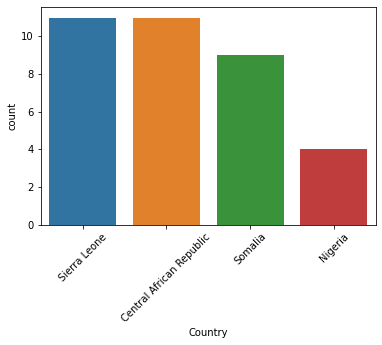

In [94]:
sns.countplot(Worst_Countries.Country,order = Worst_Countries['Country'].value_counts().index)
plt.xticks(rotation=45)

In [98]:
#Sierra Leone has been the worst performing country over the years
# followed by Central African Republic, Somalia & Nigeria

# Creating Dataframes to plot the percent changes in the IMR for the Worst Performing Countries

In [96]:
Sierra_Leone=Worst_Countries[Worst_Countries['Country']=='Sierra Leone']
Central_African_Republic=Worst_Countries[Worst_Countries['Country']=='Central African Republic']
Somalia=Worst_Countries[Worst_Countries['Country']=='Somalia']
Nigeria=Worst_Countries[Worst_Countries['Country']=='Nigeria']

In [97]:
Sierra_Leone

,Country,Infant Mortality Rate,Gender,Year
7547,Sierra Leone,110.807610,Total,2009.0
7316,Sierra Leone,107.152659,Total,2010.0
7085,Sierra Leone,103.538974,Total,2011.0
6854,Sierra Leone,100.176109,Total,2012.0
6623,Sierra Leone,97.021639,Total,2013.0
6392,Sierra Leone,94.873266,Total,2014.0
6161,Sierra Leone,94.168116,Total,2015.0
5930,Sierra Leone,88.574606,Total,2016.0
5699,Sierra Leone,85.929684,Total,2017.0
5468,Sierra Leone,83.351910,Total,2018.0


In [99]:
Sierra_Leone['Rate of Change']=Sierra_Leone['Infant Mortality Rate'].pct_change()
Central_African_Republic['Rate of Change']=Central_African_Republic['Infant Mortality Rate'].pct_change()
Somalia['Rate of Change']=Somalia['Infant Mortality Rate'].pct_change()
Nigeria['Rate of Change']=Nigeria['Infant Mortality Rate'].pct_change()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [100]:
Sierra_Leone


,Country,Infant Mortality Rate,Gender,Year,Rate of Change
7547,Sierra Leone,110.807610,Total,2009.0,NaN
7316,Sierra Leone,107.152659,Total,2010.0,-0.032985
7085,Sierra Leone,103.538974,Total,2011.0,-0.033725
6854,Sierra Leone,100.176109,Total,2012.0,-0.032479
6623,Sierra Leone,97.021639,Total,2013.0,-0.031489
6392,Sierra Leone,94.873266,Total,2014.0,-0.022143
6161,Sierra Leone,94.168116,Total,2015.0,-0.007433
5930,Sierra Leone,88.574606,Total,2016.0,-0.059399
5699,Sierra Leone,85.929684,Total,2017.0,-0.029861
5468,Sierra Leone,83.351910,Total,2018.0,-0.029999


In [101]:
Worst_Countries_1=pd.concat([Sierra_Leone,Central_African_Republic,Somalia,Nigeria])
Worst_Countries_1.groupby(['Country'])
Worst_Countries_1

,Country,Infant Mortality Rate,Gender,Year,Rate of Change
7547,Sierra Leone,110.807610,Total,2009.0,NaN
7316,Sierra Leone,107.152659,Total,2010.0,-0.032985
7085,Sierra Leone,103.538974,Total,2011.0,-0.033725
6854,Sierra Leone,100.176109,Total,2012.0,-0.032479
6623,Sierra Leone,97.021639,Total,2013.0,-0.031489
6392,Sierra Leone,94.873266,Total,2014.0,-0.022143
6161,Sierra Leone,94.168116,Total,2015.0,-0.007433
5930,Sierra Leone,88.574606,Total,2016.0,-0.059399
5699,Sierra Leone,85.929684,Total,2017.0,-0.029861
5468,Sierra Leone,83.351910,Total,2018.0,-0.029999


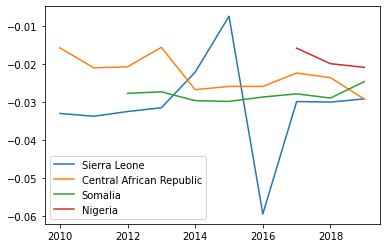

In [102]:
plt.plot(Sierra_Leone['Year'],Sierra_Leone['Rate of Change'],label='Sierra Leone')
plt.plot(Central_African_Republic['Year'],Central_African_Republic['Rate of Change'],label='Central African Republic')
plt.plot(Somalia['Year'],Somalia['Rate of Change'], label='Somalia')
plt.plot(Nigeria['Year'],Nigeria['Rate of Change'],label='Nigeria')
plt.legend()
plt.show()

#Central Arfican Republic and Nigeria are showing a downward trend 
#there is a sudden spike in IMR for Sierra Leone and then it is followed by a sudden dip before plateauing again.

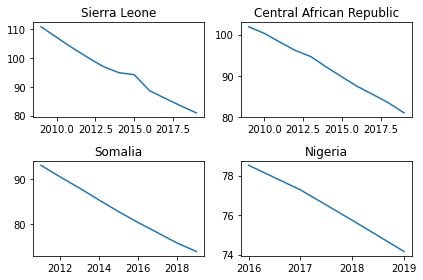

In [103]:
#generating sub plots to see the repetition of the values in the categorical columns

#plt.figure(figsize=(20,20))
#plt.subplot(2,2,1)
#plt.plot(Sierra_Leone['Year'],Sierra_Leone['Infant Mortality Rate'])




#plt.subplot(2,2,2)
#plt.plot(Central_African_Republic['Year'],Central_African_Republic['Infant Mortality Rate'])


#plt.subplot(2,2,3)
#plt.plot(Somalia['Year'],Somalia['Infant Mortality Rate'])


#plt.subplot(2,2,4)
#plt.plot(Nigeria['Year'],Nigeria['Infant Mortality Rate'])



  
# making subplots
fig, ax = plt.subplots(2, 2)
  
# set data with subplots and plot
ax[0, 0].plot(Sierra_Leone['Year'],Sierra_Leone['Infant Mortality Rate'])
ax[0, 1].plot(Central_African_Republic['Year'],Central_African_Republic['Infant Mortality Rate'])
ax[1, 0].plot(Somalia['Year'],Somalia['Infant Mortality Rate'])
ax[1, 1].plot(Nigeria['Year'],Nigeria['Infant Mortality Rate'])
  
# set the title to subplots
ax[0, 0].set_title("Sierra Leone")
ax[0, 1].set_title("Central African Republic")
ax[1, 0].set_title("Somalia")
ax[1, 1].set_title("Nigeria")
  
# set spacing
fig.tight_layout()
plt.show()


# Creating a Pandas Dataframe to visualise the best performing countries over the years

In [108]:
Best_Countries=pd.concat([best_countries_2009.head(),best_countries_2010.head(),best_countries_2011.head(),best_countries_2012.head(),best_countries_2013.head(),best_countries_2014.head(),best_countries_2015.head(),best_countries_2016.head(),best_countries_2017.head(),best_countries_2018.head(),top_countries.head()])

In [110]:
Best_Countries

,Country,Infant Mortality Rate,Gender,Year
7474,Iceland,2.144415,Total,2009.0
7545,Singapore,2.237839,Total,2009.0
7479,Japan,2.428140,Total,2009.0
7496,Luxembourg,2.532759,Total,2009.0
7557,Sweden,2.555417,Total,2009.0
7243,Iceland,2.069225,Total,2010.0
7314,Singapore,2.235684,Total,2010.0
7248,Japan,2.348748,Total,2010.0
7318,San Marino,2.415347,Total,2010.0
7218,Finland,2.465200,Total,2010.0


In [109]:
Best_Countries.Country.value_counts()
#Iceland & Japan have consistently been performing well in the time frame chosen followed by San Marino and Finland.

Iceland       11
Japan         11
San Marino    10
Finland        8
Slovenia       6
Singapore      5
Cyprus         2
Luxembourg     1
Sweden         1
Name: Country, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

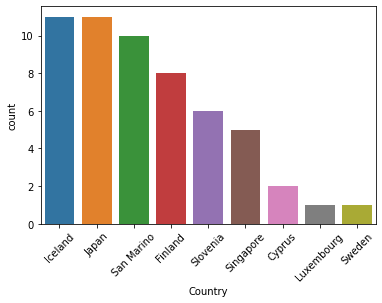

In [111]:
sns.countplot(Best_Countries.Country,order = Best_Countries['Country'].value_counts().index)
plt.xticks(rotation=45)

In [112]:
# Iceland has been performing the best in terms of IMR over the years

# Creation of Dataframes to plot the percent changes in the IMR for the Best Peforming Countries 

In [113]:
Iceland=Best_Countries[Best_Countries['Country']=='Iceland']
Japan=Best_Countries[Best_Countries['Country']=='Japan']
San_Marino=Best_Countries[Best_Countries['Country']=='San Marino']
Finland=Best_Countries[Best_Countries['Country']=='Finland']
Slovenia=Best_Countries[Best_Countries['Country']=='Slovenia']
Singapore=Best_Countries[Best_Countries['Country']=='Singapore']
Cyprus=Best_Countries[Best_Countries['Country']=='Cyprus']
Luxembourg=Best_Countries[Best_Countries['Country']=='Luxembourg']
Sweden=Best_Countries[Best_Countries['Country']=='Sweden']

In [114]:
Iceland['Rate of Change']=Iceland["Infant Mortality Rate"].pct_change()
Japan['Rate of Change']=Japan["Infant Mortality Rate"].pct_change()
San_Marino['Rate of Change']=San_Marino["Infant Mortality Rate"].pct_change()
Finland['Rate of Change']=Finland["Infant Mortality Rate"].pct_change()
Slovenia['Rate of Change']=Slovenia["Infant Mortality Rate"].pct_change()
Singapore['Rate of Change']=Singapore["Infant Mortality Rate"].pct_change()
Cyprus['Rate of Change']=Cyprus["Infant Mortality Rate"].pct_change()
Luxembourg['Rate of Change']=Luxembourg["Infant Mortality Rate"].pct_change()
Sweden['Rate of Change']=Sweden["Infant Mortality Rate"].pct_change()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [115]:
Best_Countries_1=pd.concat([Iceland,Japan,San_Marino,Finland,Slovenia,Singapore,Cyprus,Luxembourg,Sweden])
Best_Countries_1.groupby('Country')
Best_Countries_1

,Country,Infant Mortality Rate,Gender,Year,Rate of Change
7474,Iceland,2.144415,Total,2009.0,NaN
7243,Iceland,2.069225,Total,2010.0,-0.035063
7012,Iceland,2.002791,Total,2011.0,-0.032106
6781,Iceland,1.937068,Total,2012.0,-0.032816
6550,Iceland,1.875263,Total,2013.0,-0.031907
6319,Iceland,1.819100,Total,2014.0,-0.029949
6088,Iceland,1.762154,Total,2015.0,-0.031305
5857,Iceland,1.707952,Total,2016.0,-0.030759
5626,Iceland,1.657724,Total,2017.0,-0.029409
5395,Iceland,1.604188,Total,2018.0,-0.032295


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


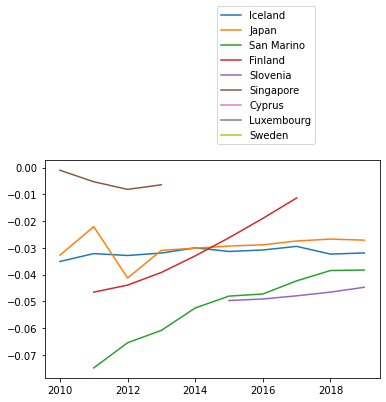

In [116]:
plt.plot(Iceland['Year'],Iceland['Rate of Change'],label='Iceland')
plt.plot(Japan['Year'],Japan['Rate of Change'],label='Japan')
plt.plot(San_Marino['Year'],San_Marino['Rate of Change'], label='San Marino')
plt.plot(Finland['Year'],Finland['Rate of Change'],label='Finland')
plt.plot(Slovenia['Year'],Slovenia['Rate of Change'],label='Slovenia')
plt.plot(Singapore['Year'],Singapore['Rate of Change'],label='Singapore')
plt.plot(Cyprus['Year'],Cyprus['Rate of Change'],label='Cyprus')
plt.plot(Luxembourg['Year'],Luxembourg['Rate of Change'],label='Luxembourg')
plt.plot(Sweden['Year'],Sweden['Rate of Change'],label='Sweden')
plt.legend(loc='bottom right', bbox_to_anchor=(0.5, 1.05))
plt.show()

#for san marino and finland the rate of change  magnitude is decreasing 


# New Section

In [121]:
Focus_countries=['Iceland','Japan','San Marino','Finland','Slovenia','Sweden','Singapore','Cyprus','Luxembourg','Sierra Leone','Central African Republic','Somalia','Nigeria']

Total_IMR_for_focus_countries=df_total[df_total['Country'].isin(Focus_countries)]
Male_IMR_for_focus_countries=df_males[df_males['Country'].isin(Focus_countries)]
Female_IMR_for_focus_countries=df_females[df_females['Country'].isin(Focus_countries)]

aa=Total_IMR_for_focus_countries.groupby('Country')['Infant Mortality Rate'].agg('mean')
bb=Male_IMR_for_focus_countries.groupby('Country')['Infant Mortality Rate'].agg('mean')
cc=Female_IMR_for_focus_countries.groupby('Country')['Infant Mortality Rate'].agg('mean')



aa,bb,cc



(Country
 Central African Republic    91.848428
 Cyprus                       2.392451
 Finland                      2.163699
 Iceland                      1.830269
 Japan                        2.089452
 Luxembourg                   2.378818
 Nigeria                     80.273319
 San Marino                   1.935546
 Sierra Leone                95.137783
 Singapore                    2.175673
 Slovenia                     2.155112
 Somalia                     85.594092
 Sweden                       2.344993
 Name: Infant Mortality Rate, dtype: float64, Country
 Central African Republic     98.853928
 Cyprus                        2.577742
 Finland                       2.355705
 Iceland                       1.979099
 Japan                         2.197841
 Luxembourg                    2.590563
 Nigeria                      87.278892
 San Marino                    2.093359
 Sierra Leone                100.914417
 Singapore                     2.350298
 Slovenia                     

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


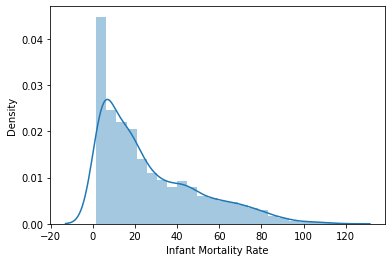

In [ ]:
sns.distplot(df_males['Infant Mortality Rate'])

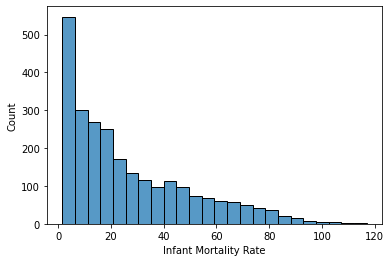

In [122]:
sns.histplot(df_males['Infant Mortality Rate'])

In [123]:
df_females['Infant Mortality Rate'].describe()

count    2541.000000
mean       22.163122
std        19.545375
min         1.361716
25%         6.261149
50%        15.458039
75%        33.496041
max       104.331928
Name: Infant Mortality Rate, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


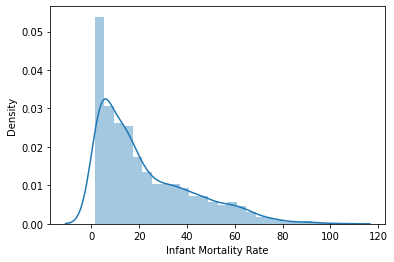

In [124]:
sns.distplot(df_females['Infant Mortality Rate'])

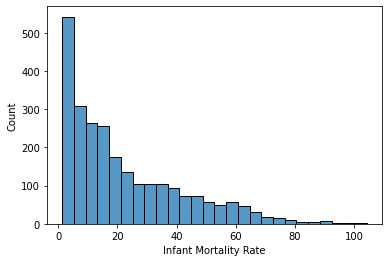

In [125]:
sns.histplot(df_females['Infant Mortality Rate'])

In [126]:
df_total["Infant Mortality Rate"].describe()

count    2541.000000
mean       24.499535
std        21.468811
min         1.493181
25%         6.844610
50%        17.102956
75%        37.149892
max       110.807610
Name: Infant Mortality Rate, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


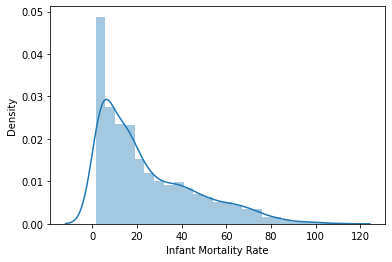

In [127]:
sns.distplot(df_total['Infant Mortality Rate'])

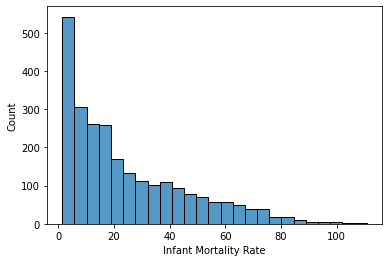

In [128]:
sns.histplot(df_total['Infant Mortality Rate'])

In [129]:
x_2009.describe()

,Infant Mortality Rate,Year
count,231.000000,231.0
mean,28.369246,2009.0
std,24.365958,0.0
min,2.144415,2009.0
25%,8.564789,2009.0
50%,20.048250,2009.0
75%,44.800758,2009.0
max,110.807610,2009.0


In [130]:
IMR_2019.describe()

,Infant Mortality Rate,Year
count,231.000000,231.0
mean,21.160393,2019.0
std,18.672680,0.0
min,1.493181,2019.0
25%,5.846095,2019.0
50%,14.486694,2019.0
75%,32.241502,2019.0
max,81.003217,2019.0


# t Test to see whether there has been significant change in the Total IMR in 2019 compared to the total IMR in 2009.

#H0= there is no significant difference in the means 
#H1=there is a significant difference in the means

In [132]:
IMR_2009=x_2009['Infant Mortality Rate']
IMR_2009

7392    66.525823
7393    80.484163
7394    12.914518
7395     4.459207
7396     7.442452
          ...    
7618    16.894304
7619    44.940469
7620    36.460146
7621    54.130195
7622    55.866004
Name: Infant Mortality Rate, Length: 231, dtype: float64

In [133]:
print(type(IMR_2009))

<class 'pandas.core.series.Series'>


In [134]:
IMR_2009.tolist()

[66.5258234811252,
 80.4841628148617,
 12.914517972231,
 4.45920749846543,
 7.44245190543819,
 13.3415386984217,
 17.4043967627535,
 9.1328058095604,
 4.18494371614083,
 3.67606071716899,
 34.7577846464572,
 62.5553187558419,
 3.6998875568959,
 71.8357274344388,
 70.450107844042,
 40.5061778692003,
 9.29438960465369,
 7.62097954531485,
 13.6349262767747,
 6.57219225416337,
 4.56249498365355,
 16.6343162062614,
 34.5833551546348,
 17.4728508264313,
 13.9296965852371,
 7.81330691422076,
 35.8418890732964,
 22.9273596207891,
 101.89284423522,
 4.95598471384077,
 3.98153440889851,
 7.52320728657986,
 14.6602149897844,
 76.6545407183901,
 71.2713943955312,
 86.2730442855657,
 44.6610464506931,
 9.65014340315311,
 16.2517308161618,
 63.6286158301546,
 22.707225149913,
 9.37348589158108,
 4.96033661971485,
 3.12737138376953,
 2.85784304313838,
 3.54313731164401,
 64.1336679834558,
 20.1722646189332,
 3.55126929334181,
 28.4625294893904,
 24.38152599534,
 16.3715697138928,
 25.0543358935224,
 

In [135]:
IMR_in_2019=IMR_2019['Infant Mortality Rate']
IMR_in_2019.tolist()

[46.5128248805674,
 50.1801546190397,
 8.61427894660596,
 2.83160690998396,
 6.40488881716623,
 8.23805277641469,
 10.5087235091144,
 5.79041079729217,
 3.05181636516712,
 2.84519544265707,
 18.2375753831603,
 39.8503569945837,
 2.73519948154153,
 59.001273580197,
 53.9372429075304,
 25.5896605777175,
 5.62880433869209,
 5.90177826928243,
 10.8555097897201,
 5.05813987425285,
 2.42191846824932,
 10.5892904273596,
 21.194508914149,
 12.4478381891936,
 11.7411077304785,
 9.55267735239823,
 23.8496660994338,
 32.2555448405426,
 81.0032170217828,
 4.24551803345304,
 3.56609688171907,
 5.96643975221853,
 6.75893348741614,
 58.5996692313532,
 50.1732769530837,
 66.1081354197287,
 34.8506343407123,
 6.51391102463179,
 11.8379662044805,
 48.2800461184456,
 12.7897753842176,
 7.5435707882582,
 3.80989744136565,
 1.83956034408744,
 2.52871844588288,
 3.21893323662476,
 48.4167994860968,
 30.9364925143561,
 3.24068575573038,
 23.4518297479001,
 19.9548665714491,
 12.0379280801391,
 17.32535891239

In [136]:
from scipy import stats
stats.ttest_rel(IMR_2009,IMR_in_2019)

Ttest_relResult(statistic=15.699743730729606, pvalue=3.057480415596024e-38)

In [161]:
# the p value comes to be very small since it is in the power of 10^(-3)
# therefore we can say that there is infact significant change in the IMR from 2009 to 2019

In [138]:
males=df_males['Infant Mortality Rate']
females=df_females['Infant Mortality Rate']
males.tolist()
females.tolist()

[43.0507312649387,
 44.8510454726021,
 7.65944226728669,
 2.55545069782505,
 5.71682531718474,
 7.26760770763785,
 9.39101414520884,
 5.33619747347301,
 2.77284210358106,
 2.5766013658809,
 16.3236229799716,
 35.4891163595225,
 2.38924990199439,
 53.2507464584369,
 49.0560781815822,
 23.7618452651307,
 5.04163140094716,
 5.71556040759042,
 10.0666257015513,
 4.57152567451523,
 2.13000081548894,
 9.53010185572227,
 18.8924379762283,
 10.9173926108387,
 10.6275658351702,
 8.55520360333223,
 21.5089229489526,
 29.0506410874595,
 74.25667271446,
 3.94465937922047,
 3.25701995005845,
 5.45758005849855,
 6.32844594290925,
 51.527501640153,
 44.8125300966189,
 59.9389845104729,
 31.2344578361264,
 5.8003899768317,
 10.4507216780498,
 43.6567727023874,
 11.5326219588604,
 7.02953446825234,
 3.37809429761668,
 1.68793233039874,
 2.22219940678854,
 2.936299061335,
 43.9611756141787,
 28.4910479264258,
 2.78580568465106,
 21.1511354792549,
 18.5916165910953,
 10.5350087757294,
 16.07148704365,
 2

# t-Test to check whether India's IMR is higher than the IMR of the World

# Ho: there is no difference in the means 
# H1: there is significant differnce in the means

In [140]:
total_imr=df_total['Infant Mortality Rate']
total_imr.tolist()

[46.5128248805674,
 50.1801546190397,
 8.61427894660596,
 2.83160690998396,
 6.40488881716623,
 8.23805277641469,
 10.5087235091144,
 5.79041079729217,
 3.05181636516712,
 2.84519544265707,
 18.2375753831603,
 39.8503569945837,
 2.73519948154153,
 59.001273580197,
 53.9372429075304,
 25.5896605777175,
 5.62880433869209,
 5.90177826928243,
 10.8555097897201,
 5.05813987425285,
 2.42191846824932,
 10.5892904273596,
 21.194508914149,
 12.4478381891936,
 11.7411077304785,
 9.55267735239823,
 23.8496660994338,
 32.2555448405426,
 81.0032170217828,
 4.24551803345304,
 3.56609688171907,
 5.96643975221853,
 6.75893348741614,
 58.5996692313532,
 50.1732769530837,
 66.1081354197287,
 34.8506343407123,
 6.51391102463179,
 11.8379662044805,
 48.2800461184456,
 12.7897753842176,
 7.5435707882582,
 3.80989744136565,
 1.83956034408744,
 2.52871844588288,
 3.21893323662476,
 48.4167994860968,
 30.9364925143561,
 3.24068575573038,
 23.4518297479001,
 19.9548665714491,
 12.0379280801391,
 17.32535891239

In [144]:
India_total=df_total[df_total['Country']=='India']
India_males=df_total[df_total['Country']=='India']
India_females=df_total[df_total['Country']=='India']

In [145]:
India_total_IMR=India_total['Infant Mortality Rate']
India_total_IMR.tolist()

[28.2567726682913,
 29.7326021256055,
 31.3607186417107,
 33.1062993248473,
 34.9424206979115,
 36.8504433950128,
 38.8416474538724,
 40.8929761311821,
 43.0015209412372,
 45.1392874976937,
 47.3048946797447]

In [150]:
India_total_IMR.mean()

37.220871232464475

In [152]:
zz=total_imr.mean()

In [153]:
from scipy import stats
stats.ttest_1samp(India_total_IMR,zz)

Ttest_1sampResult(statistic=6.613955467032034, pvalue=5.97272159229643e-05)

In [159]:
r=(5.97)*10**(-5)
p_value=r/2
p_value

2.985e-05

In [160]:
p_value<0.05

True

In [ ]:
#since the p-value is lesser than the significance level therefore we conclude that India's IMR is Greater than the Worlds's IMR

# Z test to check whether the number of countries which are performing poorly has increased or decreased is significant or not vis a vis 2009 to 2019

In [165]:
#p1_2009=2/231
#p2_2019=4/231

numerator=(4/231)-(2/231)
p=((231*2)+(231*4))/(231+231)
q=1-p

from math import sqrt

denom_1=p*q
denom_2=(1/231)+((1/231))

print('numerator:',numerator)#'denom:',denom)

numerator: 0.008658008658008658


In [167]:
denom_1=int(denom_1)
denom_2=int(denom_2)

In [169]:
denom_value=0.008654

In [170]:
numerator/denom_value

1.0004632144682988

In [171]:
#since the test stat is 1.0004 which is smaller than the z value of a 2 tailed test at 
#0.05 which is 1.96 it means that there has not been a significant decrease in the number of countries which are performing poorly between 2009 and 2019